# 뉴스 기사 분류 : 다중분류 문제
- p160, 1986년 로이터 데이터셋
- 46개의 토픽 존재
- 10개의 샘플 존재

## 로이터 데이터셋 가져오기

In [1]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

2110848/2110848 [==============================] - 0s 0us/step


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

## 디코딩

In [5]:
word_index = reuters.get_word_index()
reverse_word_index =  dict(
    [(value, key) for (key, value) in word_index.items()])

decode_newswire = " ".join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]]
)

decode_newswire

550378/550378 [==============================] - 0s 0us/step


'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [13]:
train_labels # 토픽의 인덱스가 0~45 사이 정수

array([ 3,  4,  3, ..., 25,  3, 25])

## 인코딩
- (비유적)독립변수 전체를 벡터 변환

In [24]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1.

  return results

In [25]:
x_train = vectorize_sequences(train_data) # 훈련 데이터 벡터 변환
x_test = vectorize_sequences(test_data) # 테스트 데이터 벡터 변환

- 종속변수 전체 인코딩 ==> 범주형 인코딩

In [26]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

y_train = to_one_hot(train_labels) # 훈련 레이블 벡터 변환
y_test = to_one_hot(test_labels) # 테스트 레이블 벡터 변환

In [48]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(train_labels) # 범주형 형태로 설정
y_test = to_categorical(test_labels) # 범주형 형태로 설정

y_train.shape, y_test.shape

((8982, 46), (2246, 46))

## 모델 만들기

In [31]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax') # 3개이상 분류는 softmax
])

# 모델 컴파일하기
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy", # 2차원 배열
              metrics=["accuracy"])

## 검증 세트 준비

In [32]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

## 모델 훈련하기

In [33]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
16/16 [==============================] - 7s 36ms/step - loss: 2.6977 - accuracy: 0.4934 - val_loss: 1.8192 - val_accuracy: 0.6010
Epoch 2/20
16/16 [==============================] - 0s 17ms/step - loss: 1.5186 - accuracy: 0.6749 - val_loss: 1.3692 - val_accuracy: 0.6940
Epoch 3/20
16/16 [==============================] - 0s 20ms/step - loss: 1.1594 - accuracy: 0.7494 - val_loss: 1.1972 - val_accuracy: 0.7330
Epoch 4/20
16/16 [==============================] - 0s 19ms/step - loss: 0.9474 - accuracy: 0.7983 - val_loss: 1.0758 - val_accuracy: 0.7730
Epoch 5/20
16/16 [==============================] - 0s 19ms/step - loss: 0.7862 - accuracy: 0.8299 - val_loss: 1.0478 - val_accuracy: 0.7620
Epoch 6/20
16/16 [==============================] - 0s 17ms/step - loss: 0.6624 - accuracy: 0.8561 - val_loss: 0.9530 - val_accuracy: 0.7980
Epoch 7/20
16/16 [==============================] - 0s 17ms/step - loss: 0.5527 - accuracy: 0.8822 - val_loss: 0.9159 - val_accuracy: 0.8060
Epoch 8/20
16

## 훈련과 검증 손실 그리기

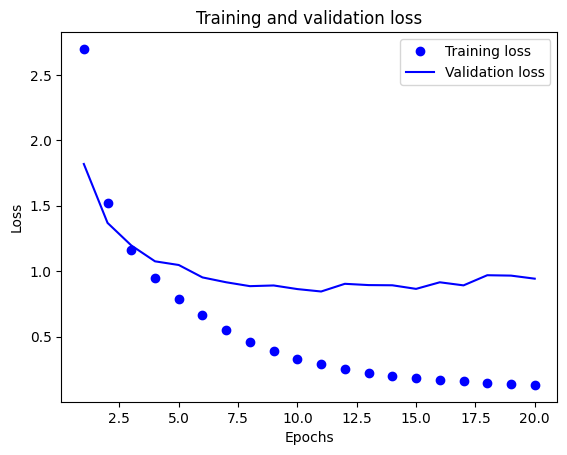

In [34]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## 훈련과 검증 정확도 그리기

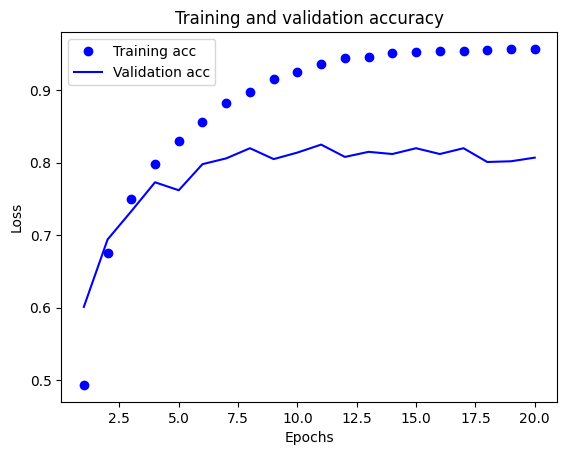

In [35]:
history_dict = history.history
loss_values = history_dict["accuracy"]
val_loss_values = history_dict["val_accuracy"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training acc")
plt.plot(epochs, val_loss_values, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## 모델 재훈련

In [38]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax') # 3개이상 분류는 softmax
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs = 9,
          batch_size = 512)

Epoch 1/9
18/18 [==============================] - 1s 14ms/step - loss: 2.6131 - accuracy: 0.4829
Epoch 2/9
18/18 [==============================] - 0s 13ms/step - loss: 1.4604 - accuracy: 0.7056
Epoch 3/9
18/18 [==============================] - 0s 14ms/step - loss: 1.1116 - accuracy: 0.7615
Epoch 4/9
18/18 [==============================] - 0s 13ms/step - loss: 0.9010 - accuracy: 0.8084
Epoch 5/9
18/18 [==============================] - 0s 14ms/step - loss: 0.7408 - accuracy: 0.8417
Epoch 6/9
18/18 [==============================] - 0s 15ms/step - loss: 0.6132 - accuracy: 0.8743
Epoch 7/9
18/18 [==============================] - 0s 16ms/step - loss: 0.5093 - accuracy: 0.8970
Epoch 8/9
18/18 [==============================] - 0s 17ms/step - loss: 0.4300 - accuracy: 0.9127
Epoch 9/9
18/18 [==============================] - 0s 20ms/step - loss: 0.3651 - accuracy: 0.9255


In [39]:
results = model.evaluate(x_test, y_test)
results

71/71 [==============================] - 0s 4ms/step - loss: 0.9373 - accuracy: 0.7930


[0.937275767326355, 0.792965292930603]

## 랜덤 분류기 정확도 확인

In [42]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.18521816562778273

## 새로운 데이터에 대해 예측

In [43]:
predictions = model.predict(x_test)
predictions[0].shape

71/71 [==============================] - 0s 2ms/step


(46,)

In [44]:
np.sum(predictions[0])

1.0000001

In [45]:
np.argmax(predictions[0])

3

## 정수 텐서로 변환하는 인코딩하여 진행

In [51]:
y_train = np.array(train_labels) # 정수형태로 설정
y_test = np.array(test_labels) # 정수형태로 설정

y_train.shape, y_test.shape # 1차원 배열

((8982,), (2246,))

In [52]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [53]:
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax') # 3개이상 분류는 softmax
])

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy", # np.array(train_labels)로 1차원 배열이므로 loss함수 다르게 설정
              metrics=["accuracy"])

model.fit(partial_x_train,
          partial_y_train,
          epochs=5,
          batch_size=512,
          validation_data=(x_val, y_val))

Epoch 1/5
16/16 [==============================] - 1s 29ms/step - loss: 2.7969 - accuracy: 0.4366 - val_loss: 1.9048 - val_accuracy: 0.5950
Epoch 2/5
16/16 [==============================] - 0s 20ms/step - loss: 1.5981 - accuracy: 0.6575 - val_loss: 1.4430 - val_accuracy: 0.6800
Epoch 3/5
16/16 [==============================] - 0s 17ms/step - loss: 1.2321 - accuracy: 0.7284 - val_loss: 1.2449 - val_accuracy: 0.7230
Epoch 4/5
16/16 [==============================] - 0s 19ms/step - loss: 1.0140 - accuracy: 0.7784 - val_loss: 1.1189 - val_accuracy: 0.7550
Epoch 5/5
16/16 [==============================] - 0s 18ms/step - loss: 0.8444 - accuracy: 0.8183 - val_loss: 1.0473 - val_accuracy: 0.8000


# 주택 가격 예측 : 회귀 문제
- 1970년 중반 보스턴 외곽지역의 범죄율
- 각 특성

## 보스턴 주택 데이터셋 불러오기

In [54]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [55]:
train_data.shape

(404, 13)

In [56]:
test_data.shape

(102, 13)

In [57]:
train_targets # 개별적인 수치 데이터

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

## 데이터 준비
- 정규화하기 : 상이한 스케일을 가진 값을 신경망에 주입하면 문제가 되므로 필요
- 왜 테스트 데이터에 train의 평균과 표준편차를 적용했는가? --> 공부하면 답변 가능
- Data Leakage 반드시 공부!!
  - 참조 : https://dschloe.github.io/python/machin_learning/ch03_data_preparation/

In [63]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

train_data -= mean
train_data /= std
test_data -= mean
test_data /= std

## 모델 구성
- 샘플개수가 적기 때문에 2개의 중간

In [68]:
def build_model():
  model = keras.Sequential([
      layers.Dense(64, activation="relu"),
      layers.Dense(64, activation="relu"),
      layers.Dense(1)
  ])
  model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
  return model

## K-겹 검증을 사용한 훈련 검증

### k겹 검증

In [70]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
  print(f"#{i+1}번째 폴드 처리중")
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples] # 검증 데이터
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate(
      [train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]],
      axis=0) # 훈련 데이터, 검증 데이터 외의 다른 부분
  partial_train_targets = np.concatenate(
      [train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]],
      axis=0)
  model = build_model()
  model.fit(partial_train_data, partial_train_targets,
            epochs=num_epochs, batch_size=16, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)

all_scores

#1번째 폴드 처리중
#2번째 폴드 처리중
#3번째 폴드 처리중
#4번째 폴드 처리중


[2.0176501274108887, 2.477092981338501, 2.579883575439453, 2.331761121749878]

### 폴드의 검증 점수 저장

In [71]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"#{i}번째 폴드 처리중")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

#0번째 폴드 처리중
#1번째 폴드 처리중
#2번째 폴드 처리중
#3번째 폴드 처리중


### 검증 점수 평균 기록

In [72]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

### 검증 점수 그래프 그리기

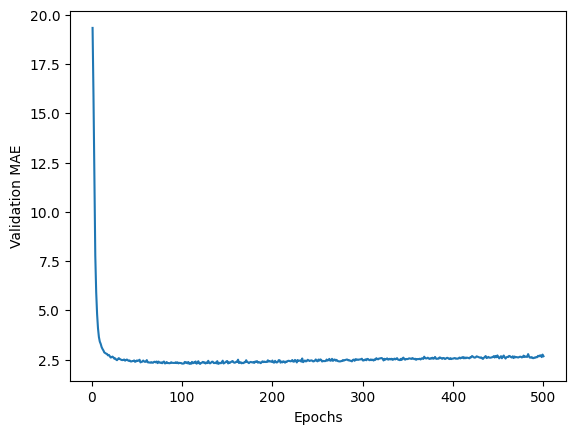

In [73]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

### 처음 10개의 데이터 포인트를 제외한 검증 점수 그래프 그리기
- 그래프에서 위로 튀는 부분 이후로는 과적합 발생

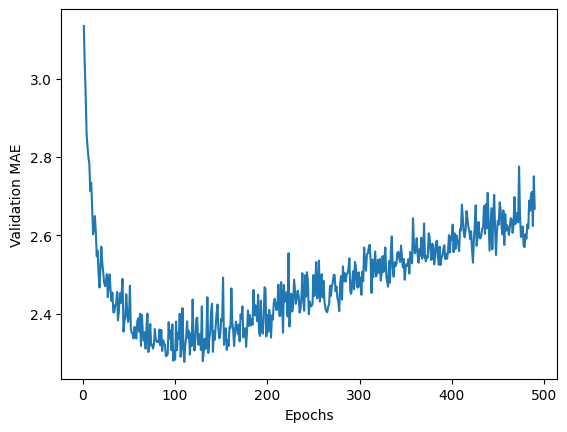

In [74]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()